In [1]:
# Use this script to save csv files into database with their filename as tablename

import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time


In [13]:
"""This script automatically loads all CSV files from the data/ folder, converts each file into a pandas DataFrame, and saves the data into an 
SQLite database (inventory.db). Each CSV file becomes a separate table in the database, named after the CSV filename. The script also logs 
every ingestion event and records the total time taken for the complete ingestion process."""


import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time

logging.basicConfig(
    filename="logs/ingestion_db.log",
    level=logging.DEBUG,
    format="%(asctime)s %(levelname)s - %(message)s",
    filemode="a"
)

In [2]:
engine = create_engine('sqlite:///invetory.db', echo=False)

In [16]:
def ingest_db(df, table_name, engine):
    '''This function will ingest the dataframe into database table'''
    df.to_sql(table_name, con=engine, if_exists = 'replace', index = False)


def load_raw_data():
    '''This function will load the CSV as dataframe and ingest into db'''
    start = time.time()
    for file in os.listdir('data'):
        if '.csv' in file:
            df=pd.read_csv('data/'+file)
            logging.info(f'Ingestion {file} in db')
            ingest_db(df, file[:-4], engine)
    end_time = time.time()
    total_time = (end_time - start)/60
    logging.info('---------------------Ingestion Complete---------------------')
    logging.info(f'\Total Time Taken: {total_time} minutes')
    print('Done')
if __name__ == '__main__':
    load_raw_data()

Done


In [ ]:
df = pd.read_sql("select * from sales", engine)
df.head(4)

In [ ]:
# table = pd.read_sql_query("select * from begin_inventory", engine)
# table

# Exploratory Data Analysis
Understanding the dataset to explore how the data is present in the database and if there is a need of creating some aggregated tables that can help with:
- Vendor selection for profitability
- Product Pricing Optimization

In [10]:
# import sqlite3 

import sqlite3
import pandas as pd

In [11]:
# creating database connection
conn = sqlite3.connect('invetory.db')

In [12]:
# checking tables present in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'",conn)
tables

,name
0,begin_inventory
1,end_inventory
2,purchases
3,purchase_prices
4,sales
5,vendor_invoice
6,vendor_sales_summary


In [13]:
# exploring what type of data available in the tables
for table in tables['name']:
    print('-'*50,f'{table}','-'*50)
    print('Count of records:',pd.read_sql_query(f"select count(*) as count from {table}",conn)['count'].values[0])
    display(pd.read_sql_query(f"select * from {table} limit 5",conn))
    

-------------------------------------------------- begin_inventory --------------------------------------------------
Count of records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- end_inventory --------------------------------------------------
Count of records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- purchases --------------------------------------------------
Count of records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------------------------------------- purchase_prices --------------------------------------------------
Count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- sales --------------------------------------------------
Count of records: 10800574


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1.0,1.57,12546.0,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY


-------------------------------------------------- vendor_invoice --------------------------------------------------
Count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


-------------------------------------------------- vendor_sales_summary --------------------------------------------------
Count of records: 10692


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchesRation
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,117614.0,4246938.86,588318.46,216101.96,68601.68,435687.26,10.258854,0.810684,1.114316
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,134205.0,4064115.91,492661.12,246588.51,144929.24,260074.69,6.399293,0.818134,1.068368
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,160776.0,3918830.24,404153.41,295412.28,123780.22,500526.56,12.772346,0.857898,1.146425
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,155815.0,3539881.85,367407.09,286298.04,257032.07,278683.91,7.872690,0.772578,1.085454
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,112470.0,3522301.30,475511.71,206651.03,257032.07,499095.29,14.169580,0.814357,1.165088


- The begin_inventory and end_inventory tables contain inventory data at the start and end of the year, which is not relevant for analyzing vendor  behavior.
- Therefore, these tables can be excluded from the analysis.
- Next, we will examine how vendor-related data is distributed across other tables.

In [14]:
# checking tables present in the database
purchases = pd.read_sql_query("select * from purchases where VendorNumber = 4466",conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [15]:
purchase_prices = pd.read_sql_query("select * from purchase_prices where VendorNumber = 4466",conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [16]:
vendor_invoice = pd.read_sql_query("""select * from vendor_invoice where VendorNumber = 4466""",conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [17]:
sales = pd.read_sql_query("""select * from sales where VendorNo = 4466""",conn)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7965,40_BULLMAR_5255,40,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-11-04,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
7966,40_BULLMAR_5255,40,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-11-05,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
7967,40_BULLMAR_5255,40,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-11-23,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
7968,41_LARNWICK_3140,41,3140,TGI Fridays Orange Dream,1.75L,1,12.99,12.99,2024-11-19,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE


In [18]:
purchases.groupby(['Brand', 'PurchasePrice'])[['Quantity', 'Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [19]:
vendor_invoice.nunique()

VendorNumber     1
VendorName       1
InvoiceDate     55
PONumber        55
PODate          54
PayDate         51
Quantity        52
Dollars         55
Freight         55
Approval         0
dtype: int64

In [20]:
vendor_invoice['PONumber'].count()

np.int64(55)

In [21]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [22]:
sales.groupby('Brand')[['SalesDollars', 'SalesPrice', 'SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
3140,44204.97,25174.62,3403
5215,52089.90,35540.64,4010
5255,65768.37,42815.04,5063


- The purchases table contains actual purchase data, including the date of purchase, products (brands) purchased by vendors, the amount paid (in dollars), and the quantity purchased.
- The purchase price column is derived from the purchase_prices table, which provides product-wise actual and purchase prices. The combination of vendor and brand is unique in this table.
- The vendor_invoice table aggregates data from the purchases table, summarizing quantity and dollar amounts, along with an additional column for freight. This table maintains uniqueness based on vendor and PO number.
- The sales table captures actual sales transactions, detailing the brands purchased by vendors, the quantity sold, the selling price, and the revenue earned.
---
As the data that we need for analysis is distributed in different tables, we need to create a summary table containing:
- purchase transactions made by vendors
- sales transaction data
- freight costs for each vendor
- actual product prices from vendors


# Let's first explore each summary in different tables.

In [31]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [23]:
freight_summary = pd.read_sql_query("""select VendorName, sum(Freight) as Freightcost from vendor_invoice group by  VendorNumber""", conn)
freight_summary

,VendorName,Freightcost
0,"IRA GOLDMAN AND WILLIAMS, LLP",27.08
1,AAPER ALCOHOL & CHEMICAL CO,0.48
2,ADAMBA IMPORTS INTL INC,367.52
3,ALTAMAR BRANDS LLC,62.39
4,AMERICAN SPIRITS EXCHANGE,6.19
...,...,...
121,Serralles Usa LLC,856.02
122,STARK BREWING COMPANY,130.09
123,SWEETWATER FARM,178.34
124,TAMWORTH DISTILLING,202.50


In [35]:
purchase_prices.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

In [37]:
purchases.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')

In [46]:
pd.read_sql_query("""SELECT p.VendorNumber, p.VendorName, p.Brand, p.PurchasePrice, 
    pp.Volume,
    pp.Price AS ActualPrice,          
    SUM(p.Quantity) AS TotalPurchaseQuantity,
    SUM(p.Dollars) AS TotalPurchaseDollars
    FROM purchases AS P
    JOIN purchase_prices AS pp ON p.Brand = pp.Brand
    WHERE P.PurchasePrice > 0
    GROUP BY p.VendorName, p.VendorNumber, p.Brand
    ORDER BY TotalPurchaseDollars""", conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22


In [48]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [53]:
pd.read_sql_query("""SELECT 
        VendorName,
        Brand,
        SUM(SalesDollars) AS TotalSalesDollars,
        SUM(SalesPrice) AS TotalSalesPrice,
        SUM(SalesQuantity) AS TotalSalesQuantity,
        SUM(ExciseTax) AS TotalExciseTax
        FROM sales
        GROUP BY VendorNo, Brand
        ORDER BY TotalSalesDollars """, conn)

,VendorName,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax
0,SAZERAC CO INC,5287,0.98,0.98,2,0.10
1,PHILLIPS PRODUCTS CO.,2773,0.99,0.99,1,0.05
2,E & J GALLO WINERY,3933,1.98,0.99,2,0.10
3,Russian Standard Vodka,3623,1.98,1.98,2,0.10
4,SAZERAC NORTH AMERICA INC.,2134,2.49,2.49,1,0.39
...,...,...,...,...,...,...
10939,DIAGEO NORTH AMERICA INC,3545,3522301.30,475511.71,112470,206651.03
10940,DIAGEO NORTH AMERICA INC,4261,3539881.85,367407.09,155815,286298.04
10941,PERNOD RICARD USA,8068,3918830.24,404153.41,160776,295412.28
10942,MARTIGNETTI COMPANIES,3405,4064115.91,492661.12,134205,246588.51


# merging all the summary table to create an aggregated summary table for further analysis

In [47]:
import time
start = time.time()

# use the Common Table Expression (CTE)
vendor_sales_summary = pd.read_sql_query("""WITH FreightSummary AS (
    SELECT 
        VendorNumber, 
        SUM(Freight) AS FreightCost 
    FROM vendor_invoice 
    GROUP BY VendorNumber
), 

PurchaseSummary AS (
    SELECT 
        p.VendorNumber,
        p.VendorName,
        p.Brand,
        p.Description,
        p.PurchasePrice,
        pp.Price AS ActualPrice,
        pp.Volume,
        SUM(p.Quantity) AS TotalPurchaseQuantity,
        SUM(p.Dollars) AS TotalPurchaseDollars
    FROM purchases p
    JOIN purchase_prices pp
        ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
    GROUP BY p.VendorNumber, p.VendorName, p.Brand, p.Description, p.PurchasePrice, pp.Price, pp.Volume
), 

SalesSummary AS (
    SELECT 
        VendorNo,
        Brand,
        SUM(SalesQuantity) AS TotalSalesQuantity,
        SUM(SalesDollars) AS TotalSalesDollars,
        SUM(SalesPrice) AS TotalSalesPrice,
        SUM(ExciseTax) AS TotalExciseTax
    FROM sales
    GROUP BY VendorNo, Brand
) 

SELECT 
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.FreightCost
FROM PurchaseSummary ps
LEFT JOIN SalesSummary ss 
    ON ps.VendorNumber = ss.VendorNo 
    AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs 
    ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC""",conn)


end = time.time()
print(f"Total time {end - start:.4f} seconds")

Total time 51.9601 seconds


In [48]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,117614.0,4246938.86,588318.46,216101.96,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,134205.0,4064115.91,492661.12,246588.51,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,160776.0,3918830.24,404153.41,295412.28,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,155815.0,3539881.85,367407.09,286298.04,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,112470.0,3522301.30,475511.71,206651.03,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5.0,15.95,10.96,0.55,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134.0,65.66,1.47,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,NaN,NaN,NaN,NaN,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,62.0,123.38,63.68,13.02,257032.07


This query generates a vendor-wise sales and purchase summary, which is valuable for:

**Performance Optimization:**
- The query involves heavy joins and aggregations on large datasets like sales and purchases.
- Storing the pre-aggregated results avoids repeated expensive computations.
- Helps in analyzing sales, purchases, and pricing for different vendors and brands.
- Future Benefits of Storing this data for faster Dashboarding & Reporting.
- Instead of running expensive queries each time, dashboards can fetch data quickly from vendor_sales_summary.

Let's clean the data if there is any inconsistencies. 

# Data Cleaning

In [49]:
vendor_sales_summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                    object
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
dtype: object

In [50]:
vendor_sales_summary.isnull().sum()

VendorNumber               0
VendorName                 0
Brand                      0
Description                0
PurchasePrice              0
ActualPrice                0
Volume                     0
TotalPurchaseQuantity      0
TotalPurchaseDollars       0
TotalSalesQuantity       501
TotalSalesDollars        501
TotalSalesPrice          501
TotalExciseTax           501
FreightCost                0
dtype: int64

In [51]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP          ', 'MARTIGNETTI COMPANIES',
       'PERNOD RICARD USA          ', 'DIAGEO NORTH AMERICA INC   ',
       'BACARDI USA INC            ', 'JIM BEAM BRANDS COMPANY    ',
       'MAJESTIC FINE WINES        ', 'ULTRA BEVERAGE COMPANY LLP ',
       'STOLI GROUP,(USA) LLC      ', 'PROXIMO SPIRITS INC.       ',
       'MOET HENNESSY USA INC      ', 'CAMPARI AMERICA            ',
       'SAZERAC CO INC             ', 'CONSTELLATION BRANDS INC   ',
       'M S WALKER INC             ', 'SAZERAC NORTH AMERICA INC. ',
       'PALM BAY INTERNATIONAL INC ', 'REMY COINTREAU USA INC     ',
       'SIDNEY FRANK IMPORTING CO  ', 'E & J GALLO WINERY         ',
       'WILLIAM GRANT & SONS INC   ', 'HEAVEN HILL DISTILLERIES   ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'CASTLE BRANDS CORP.        ', 'SOUTHERN WINE & SPIRITS NE ',
       'STE MICHELLE WINE ESTATES  ', 'TRINCHERO FAMILY ESTATES   ',
       'MHW LTD                    ', 'W

In [52]:
vendor_sales_summary['Description'].unique()

array(['Jack Daniels No 7 Black', "Tito's Handmade Vodka",
       'Absolut 80 Proof', ..., 'Crown Royal Apple',
       'Concannon Glen Ellen Wh Zin', 'The Club Strawbry Margarita'],
      dtype=object)

In [40]:
vendor_sales_summary['Volume']

0        1750.0
1        1750.0
2        1750.0
3        1750.0
4        1750.0
          ...  
10687     750.0
10688      50.0
10689      50.0
10690     200.0
10691      50.0
Name: Volume, Length: 10692, dtype: float64

In [53]:
vendor_sales_summary['Volume'] = vendor_sales_summary['Volume'].astype('float64')

In [54]:
vendor_sales_summary['Volume']

0        1750.0
1        1750.0
2        1750.0
3        1750.0
4        1750.0
          ...  
10687     750.0
10688      50.0
10689      50.0
10690     200.0
10691      50.0
Name: Volume, Length: 10692, dtype: float64

In [55]:
vendor_sales_summary.fillna(0, inplace=True)

In [56]:
vendor_sales_summary['VendorName'] = vendor_sales_summary['VendorName'].str.strip()

In [57]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP', 'MARTIGNETTI COMPANIES', 'PERNOD RICARD USA',
       'DIAGEO NORTH AMERICA INC', 'BACARDI USA INC',
       'JIM BEAM BRANDS COMPANY', 'MAJESTIC FINE WINES',
       'ULTRA BEVERAGE COMPANY LLP', 'STOLI GROUP,(USA) LLC',
       'PROXIMO SPIRITS INC.', 'MOET HENNESSY USA INC', 'CAMPARI AMERICA',
       'SAZERAC CO INC', 'CONSTELLATION BRANDS INC', 'M S WALKER INC',
       'SAZERAC NORTH AMERICA INC.', 'PALM BAY INTERNATIONAL INC',
       'REMY COINTREAU USA INC', 'SIDNEY FRANK IMPORTING CO',
       'E & J GALLO WINERY', 'WILLIAM GRANT & SONS INC',
       'HEAVEN HILL DISTILLERIES', 'DISARONNO INTERNATIONAL LLC',
       'EDRINGTON AMERICAS', 'CASTLE BRANDS CORP.',
       'SOUTHERN WINE & SPIRITS NE', 'STE MICHELLE WINE ESTATES',
       'TRINCHERO FAMILY ESTATES', 'MHW LTD', 'WINE GROUP INC',
       'PERFECTA WINES', 'LUXCO INC', 'TREASURY WINE ESTATES',
       'DIAGEO CHATEAU ESTATE WINES', 'SHAW ROSS INT L IMP LTD',
       'PINE STATE TRADING CO', 'PHILLIPS PRO

In [58]:
vendor_sales_summary.isnull().sum()

VendorNumber             0
VendorName               0
Brand                    0
Description              0
PurchasePrice            0
ActualPrice              0
Volume                   0
TotalPurchaseQuantity    0
TotalPurchaseDollars     0
TotalSalesQuantity       0
TotalSalesDollars        0
TotalSalesPrice          0
TotalExciseTax           0
FreightCost              0
dtype: int64

### create new columns to analysis:

In [72]:
# GrossProfit
vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']
vendor_sales_summary['GrossProfit']

0        435687.26
1        260074.69
2        500526.56
3        278683.91
4        499095.29
           ...    
10687        13.31
10688        63.32
10689        -1.48
10690       121.91
10691        84.43
Name: GrossProfit, Length: 10692, dtype: float64

In [73]:
# ProfitMargin
vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars'])*100
vendor_sales_summary['ProfitMargin']

0        10.258854
1         6.399293
2        12.772346
3         7.872690
4        14.169580
           ...    
10687    83.448276
10688    96.436186
10689         -inf
10690    98.808559
10691    99.166079
Name: ProfitMargin, Length: 10692, dtype: float64

In [74]:
# StockTurnover
vendor_sales_summary['StockTurnover'] = vendor_sales_summary['TotalSalesQuantity'] / vendor_sales_summary['TotalPurchaseQuantity']

In [75]:
vendor_sales_summary['SalestoPurchesRation'] = vendor_sales_summary['TotalSalesDollars'] / vendor_sales_summary['TotalPurchaseDollars']

In [107]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchesRation
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,117614.0,4246938.86,588318.46,216101.96,68601.68,435687.26,10.258854,0.810684,1.114316
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,134205.0,4064115.91,492661.12,246588.51,144929.24,260074.69,6.399293,0.818134,1.068368
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,160776.0,3918830.24,404153.41,295412.28,123780.22,500526.56,12.772346,0.857898,1.146425
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,155815.0,3539881.85,367407.09,286298.04,257032.07,278683.91,7.872690,0.772578,1.085454
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,112470.0,3522301.30,475511.71,206651.03,257032.07,499095.29,14.169580,0.814357,1.165088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,0.0,0.00,0.00,0.00,14069.87,-1.48,-inf,0.000000,0.000000
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,62.0,123.38,63.68,13.02,257032.07,121.91,98.808559,62.000000,83.931973


In [85]:
# changing datatype to float
vendor_sales_summary['Volume'] = vendor_sales_summary['Volume'].astype('float')

# filling missing value with 0
vendor_sales_summary.fillna(0,inplace = True)

# removing spaces from categorical columns
vendor_sales_summary['VendorName'] = vendor_sales_summary['VendorName'].str.strip()
vendor_sales_summary['Description'] = vendor_sales_summary['Description'].str.strip()

#  Saving cleaned data into database

In [87]:
cursor = conn.cursor()

In [90]:
# Table name (vendor_sales_summary)

# only runs once 

# create table in database:

cursor.execute("""CREATE TABLE vendor_sales_summary (
    VendorNumber INT,
    VendorName VARCHAR(100),
    Brand INT,
    Description VARCHAR(100),
    PurchasePrice DECIMAL(10,2),
    ActualPrice DECIMAL(10,2),
    Volume INT,
    TotalPurchaseQuantity INT,
    TotalPurchaseDollars DECIMAL(15,2),
    TotalSalesQuantity INT,
    TotalSalesDollars DECIMAL(15,2),
    TotalSalesPrice DECIMAL(15,2),
    TotalExciseTax DECIMAL(15,2),
    FreightCost DECIMAL(15,2),
    GrossProfit DECIMAL(15,2),
    ProfitMargin DECIMAL(15,2),
    StockTurnover DECIMAL(15,2),
    SalesToPurchaseRatio DECIMAL(15,2),
    PRIMARY KEY (VendorNumber, Brand)
);
""")


# load data into database:
# vendor_sales_summary.to_sql('vendor_sales_summary', conn, if_exists = 'replace', index = False )


OperationalError: table vendor_sales_summary already exists

In [93]:
# load data into table 'vendor_sales_summary' of database:
vendor_sales_summary.to_sql('vendor_sales_summary', conn, if_exists = 'replace', index = False )

10692

In [106]:
vendor_sales_summary['GrossProfit'].value_counts().reset_index()

,GrossProfit,count
0,52.92,4
1,55.92,4
2,-106.80,4
3,39.96,4
4,-284.16,3
...,...,...
10553,2.63,1
10554,-5.22,1
10555,39.77,1
10556,22.97,1


In [94]:
pd.read_sql_query("select * from vendor_sales_summary", conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchesRation
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,117614.0,4246938.86,588318.46,216101.96,68601.68,435687.26,10.258854,0.810684,1.114316
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,134205.0,4064115.91,492661.12,246588.51,144929.24,260074.69,6.399293,0.818134,1.068368
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,160776.0,3918830.24,404153.41,295412.28,123780.22,500526.56,12.772346,0.857898,1.146425
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,155815.0,3539881.85,367407.09,286298.04,257032.07,278683.91,7.872690,0.772578,1.085454
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,112470.0,3522301.30,475511.71,206651.03,257032.07,499095.29,14.169580,0.814357,1.165088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,0.0,0.00,0.00,0.00,14069.87,-1.48,-inf,0.000000,0.000000
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,62.0,123.38,63.68,13.02,257032.07,121.91,98.808559,62.000000,83.931973


# vendor Performance Analysis

In [ ]:
# Importing Libraries:

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Loading the Dataset

In [96]:
# create database connection:
conn = sqlite3.connect('invetory.db')

# fetching vendor summary data:
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head(10)


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchesRation
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,117614.0,4246938.86,588318.46,216101.96,68601.68,435687.26,10.258854,0.810684,1.114316
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,134205.0,4064115.91,492661.12,246588.51,144929.24,260074.69,6.399293,0.818134,1.068368
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,160776.0,3918830.24,404153.41,295412.28,123780.22,500526.56,12.772346,0.857898,1.146425
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,155815.0,3539881.85,367407.09,286298.04,257032.07,278683.91,7.872690,0.772578,1.085454
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,112470.0,3522301.30,475511.71,206651.03,257032.07,499095.29,14.169580,0.814357,1.165088
5,480,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750.0,138809,2466635.93,118704.0,2834324.96,388559.64,93466.09,89286.27,367689.03,12.972720,0.855161,1.149065
6,17035,PERNOD RICARD USA,2589,Jameson Irish Whiskey,30.76,39.99,1750.0,70783,2177285.08,49933.0,2025192.67,532243.00,91745.57,123780.22,-152092.41,-7.510022,0.705438,0.930146
7,3960,DIAGEO NORTH AMERICA INC,3102,Smirnoff Traveler,12.94,17.99,1750.0,161386,2088334.84,121825.0,2142825.75,255955.85,223840.85,257032.07,54490.91,2.542946,0.754867,1.026093
8,3960,DIAGEO NORTH AMERICA INC,3489,Tanqueray,20.73,27.99,1750.0,91835,1903739.55,78464.0,2304135.36,441131.36,144165.14,257032.07,400395.81,17.377269,0.854402,1.210321
9,12546,JIM BEAM BRANDS COMPANY,1376,Jim Beam,16.29,21.99,1750.0,108866,1773427.14,87283.0,2020253.17,375288.37,160367.40,123880.97,246826.03,12.217579,0.801747,1.139180


In [97]:
# Saves the DataFrame 'df' to a file named 'vendor_sales_summary.csv'.
# The 'index=False' argument prevents the pandas row index (the default numbering)
# from being written as an extra column in the CSV file.

df.to_csv("vendor_sales_summary.csv", index=False)

# Exploratory Data Analysis 
- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.


In [3]:
# summary statistics

df.describe()

,VendorNumber,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchesRation
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,35.643671,847.360550,3140.886831,3.010669e+04,2557.898055,3.490885e+04,15742.373305,1489.780585,61433.763214,4802.153778,-inf,1.510938,2.216454
std,18753.519148,12662.187074,109.269375,148.246016,664.309212,11095.086769,1.230678e+05,9211.548673,1.392365e+05,38309.605357,9240.181350,60938.458032,21348.171230,NaN,5.747338,8.049218
min,2.000000,58.000000,0.360000,0.490000,50.000000,1.000000,7.100000e-01,0.000000,0.000000e+00,0.000000,0.000000,0.090000,-152092.410000,-inf,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,10.990000,750.000000,36.000000,4.534575e+02,24.000000,5.308325e+02,191.935000,3.660000,14069.870000,-112.620000,-1.775369e+01,0.590272,0.849230
50%,7153.000000,18761.500000,10.455000,15.990000,750.000000,262.000000,3.655465e+03,204.000000,4.232035e+03,2199.835000,36.530000,50293.620000,536.750000,1.730176e+01,0.817387,1.209216
75%,9552.000000,25514.250000,19.482500,28.990000,750.000000,1975.750000,2.073825e+04,1554.000000,2.343315e+04,13207.295000,339.570000,79528.990000,4193.375000,3.271011e+01,1.000000,1.486107
max,201359.000000,90631.000000,5681.810000,7499.990000,20000.000000,337660.000000,3.811252e+06,288271.000000,4.246939e+06,588318.460000,295412.280000,257032.070000,502289.430000,9.971552e+01,273.400000,351.514286


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,2.557898e+03,9211.548673,0.00,24.000000,204.000000,1554.000000,2.882710e+05
TotalSalesDollars,10692.0,3.490885e+04,139236.532241,0.00,530.832500,4232.035000,23433.152500,4.246939e+06
TotalSalesPrice,10692.0,1.574237e+04,38309.605357,0.00,191.935000,2199.835000,13207.295000,5.883185e+05


<function matplotlib.pyplot.show(close=None, block=None)>

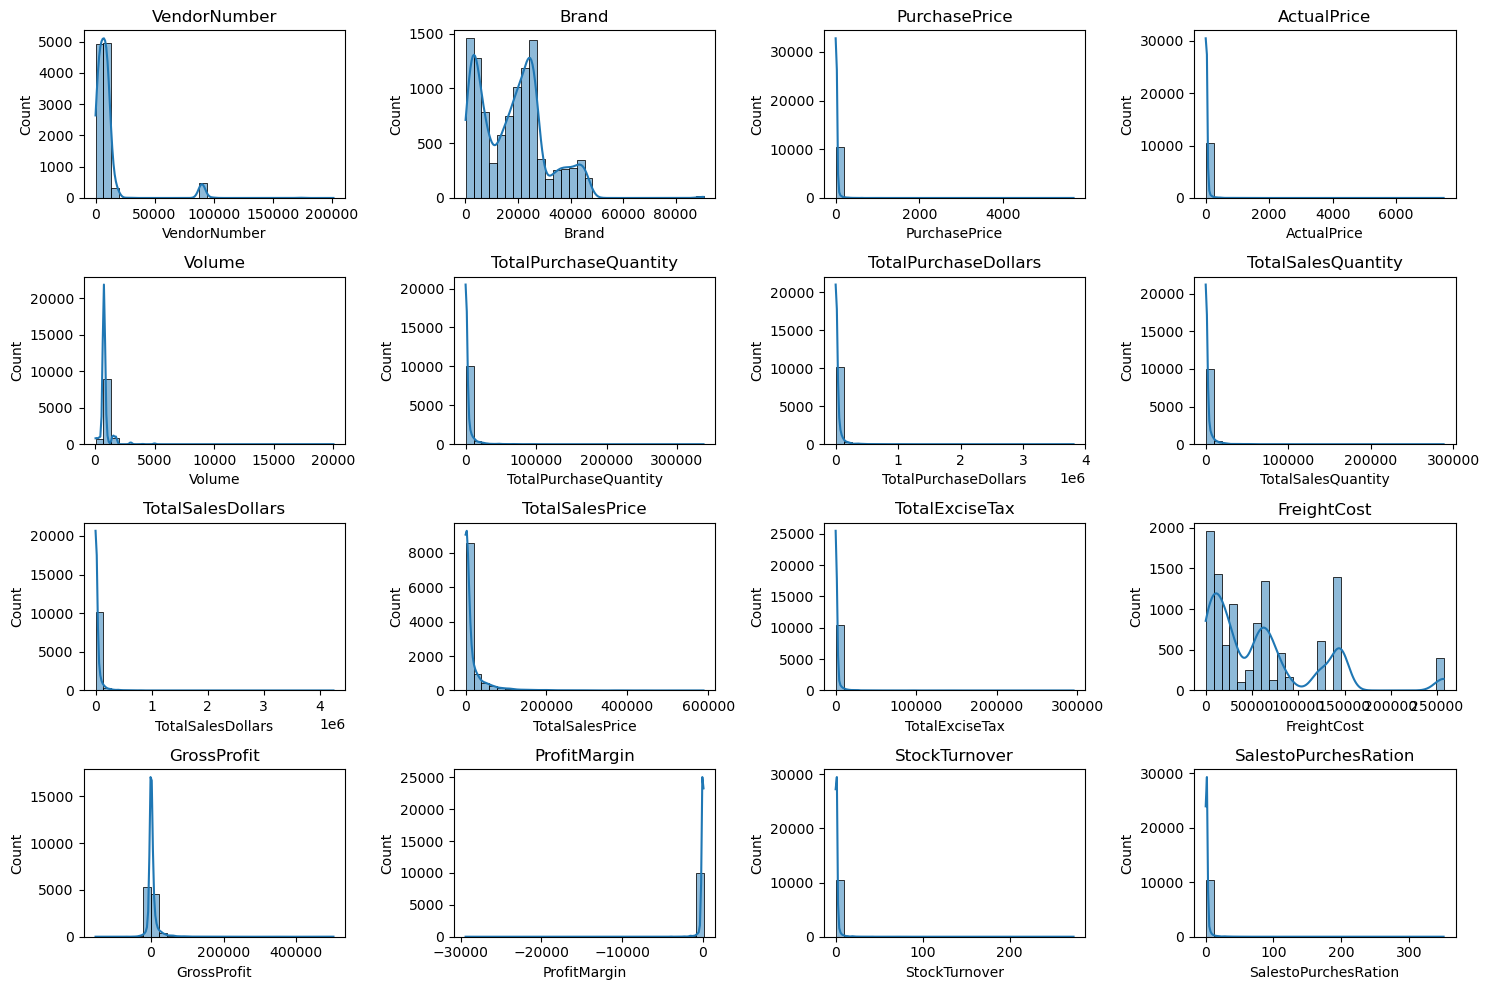

In [50]:
# Distribution plot for Numerical Columns

numerical_cols = df.select_dtypes(include=np.number).columns
# numerical_cols

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjest grid layout as needed
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

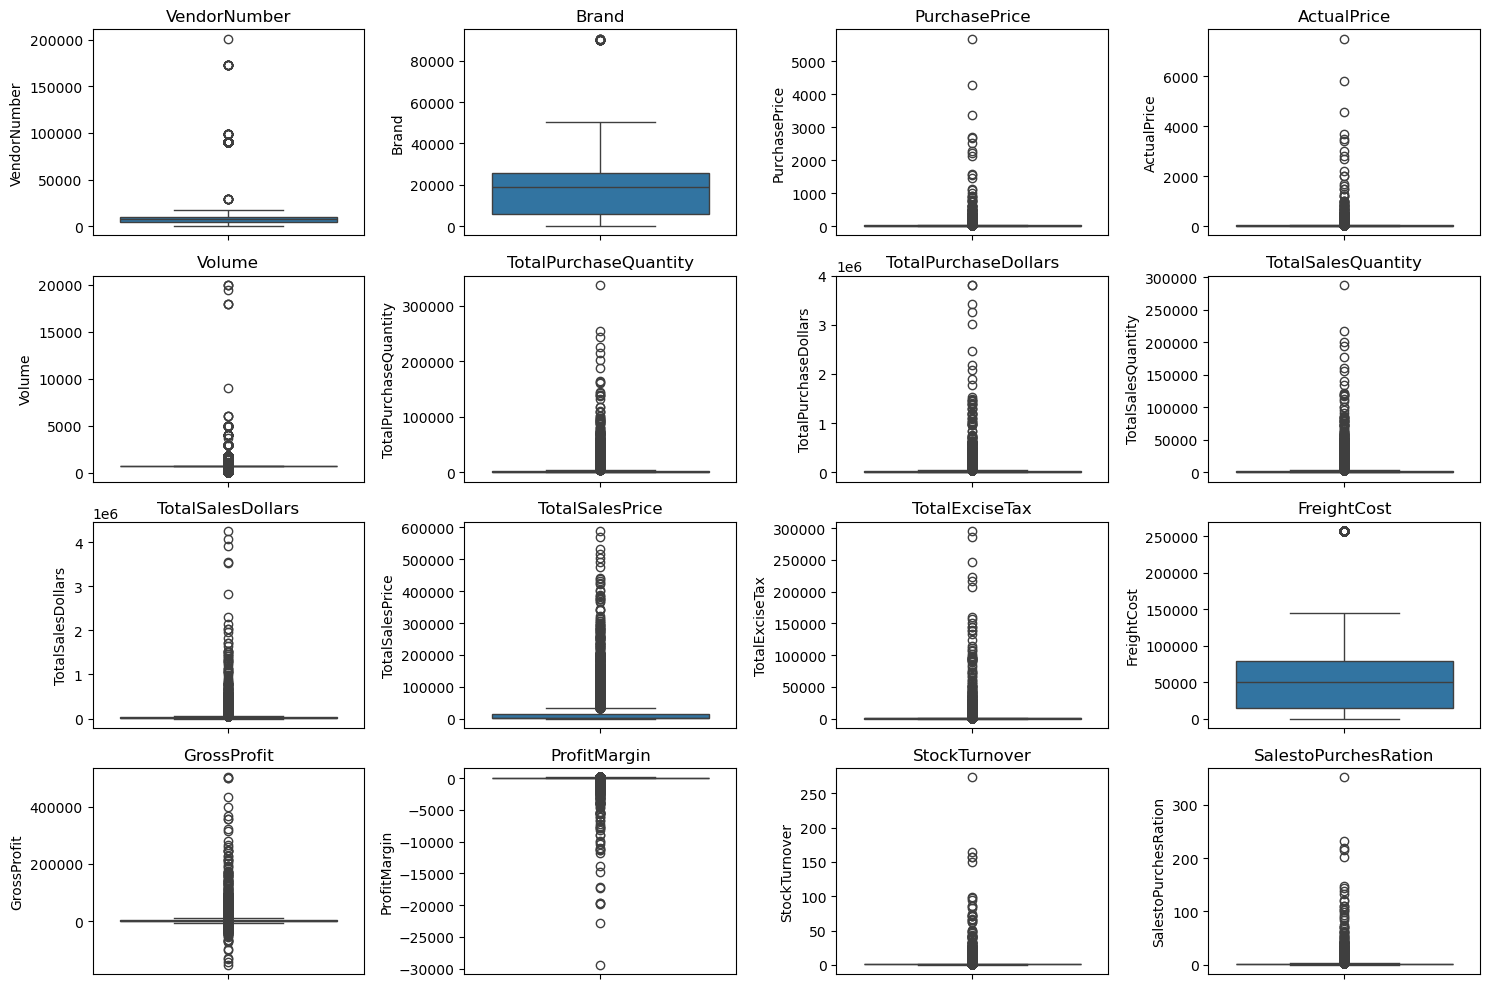

In [36]:
# Outlier Detction with Boxplots.

numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjest grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show

# Summary Statistics Insights:
*****Negative & Zero Values:*****

- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
- Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviations:**

- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [51]:
# let's filter the data by removing inconsistences

df = pd.read_sql_query("""SELECT * FROM vendor_sales_summary WHERE GrossProfit > 0 AND ProfitMargin > 0 AND TotalSalesQuantity > 0""", conn)

<function matplotlib.pyplot.show(close=None, block=None)>

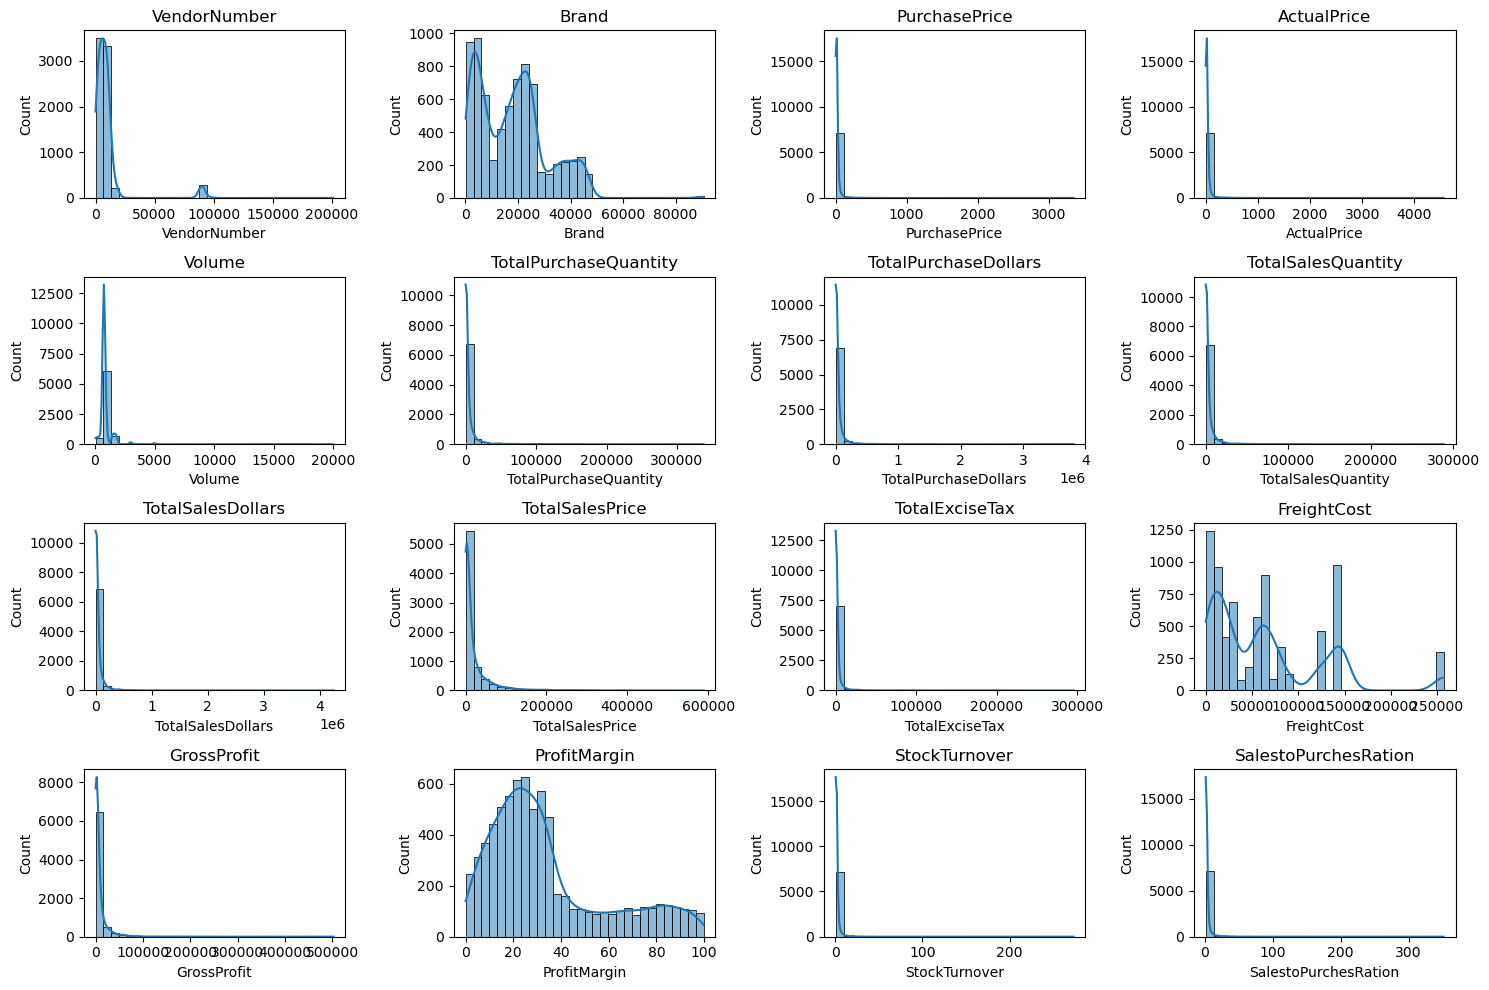

In [7]:
# Distribution plot for Numerical Columns

numerical_cols = df.select_dtypes(include=np.number).columns
# numerical_cols

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjest grid layout as needed
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

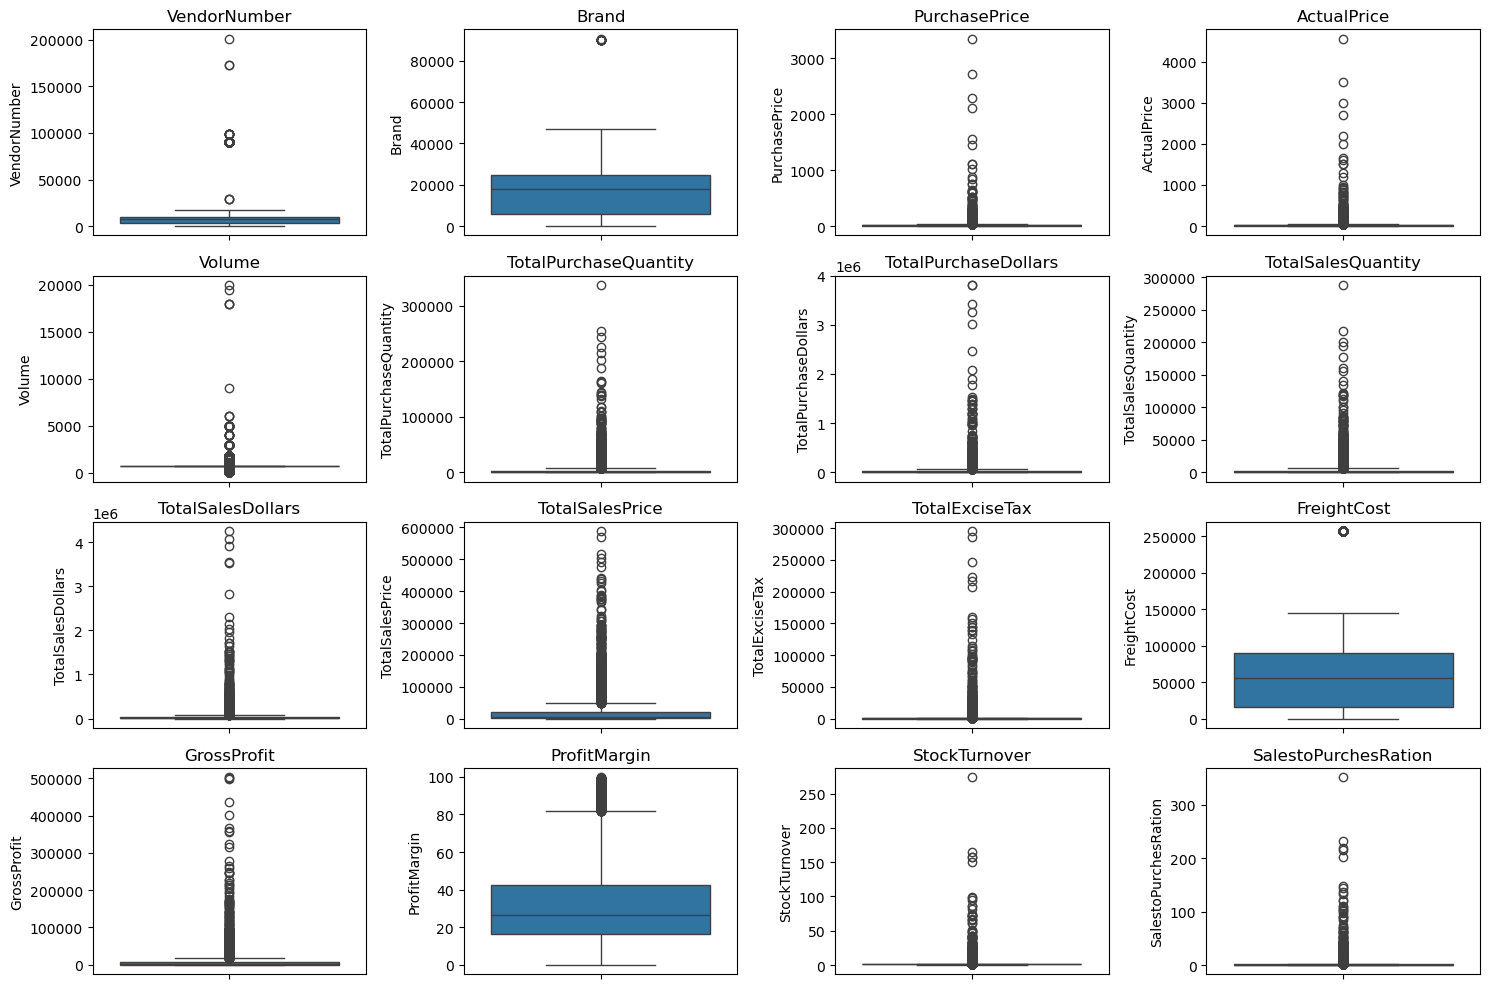

In [8]:
# Outlier Detction with Boxplots.

numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjest grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show


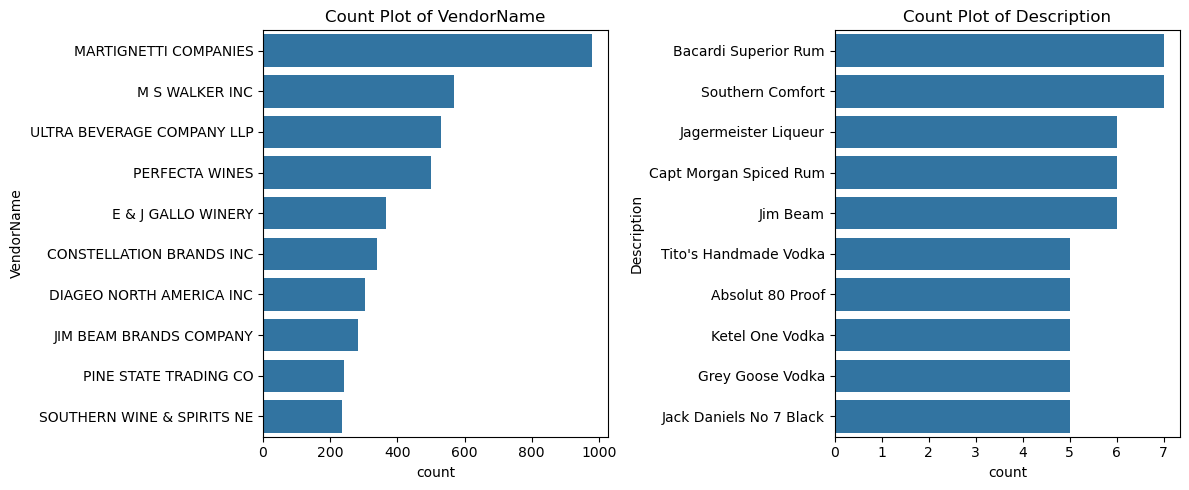

In [52]:
# Count plots for categorical columns
categoriacl_cols = ['VendorName', 'Description']

plt.figure(figsize=(12, 5))
for i, col in enumerate(categoriacl_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()


In [81]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchesRation'],
      dtype='object')

In [10]:
# Correlation Heatmap

numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
correlation_matrix


,VendorNumber,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchesRation
VendorNumber,1.000000,0.078613,-0.022267,-0.021796,-0.025951,-0.059380,-0.047682,-0.060318,-0.051998,-0.076267,-0.033878,-0.213417,-0.069246,-0.001977,-0.005641,-0.004170
Brand,0.078613,1.000000,-0.027445,-0.012578,-0.017026,-0.139530,-0.146972,-0.142894,-0.143335,-0.236966,-0.168180,-0.159774,-0.099889,0.059155,-0.028283,-0.015827
PurchasePrice,-0.022267,-0.027445,1.000000,0.994296,0.020481,-0.047814,-0.015886,-0.048782,-0.017348,-0.020208,-0.017717,-0.017634,-0.023228,0.056194,0.002634,0.001717
ActualPrice,-0.021796,-0.012578,0.994296,1.000000,0.023571,-0.052065,-0.019594,-0.053127,-0.020909,-0.026450,-0.021285,-0.021201,-0.025377,0.066684,0.003055,0.002572
Volume,-0.025951,-0.017026,0.020481,0.023571,1.000000,0.022358,0.110045,0.022063,0.115749,0.166196,0.147969,-0.012410,0.131277,-0.071408,-0.044825,-0.044840
TotalPurchaseQuantity,-0.059380,-0.139530,-0.047814,-0.052065,0.022358,1.000000,0.680267,0.997392,0.692087,0.562659,0.616142,0.170247,0.654386,-0.187574,-0.054042,-0.056424
TotalPurchaseDollars,-0.047682,-0.146972,-0.015886,-0.019594,0.110045,0.680267,1.000000,0.669240,0.996368,0.823773,0.884810,0.147622,0.821164,-0.176954,-0.045557,-0.048151
TotalSalesQuantity,-0.060318,-0.142894,-0.048782,-0.053127,0.022063,0.997392,0.669240,1.000000,0.683642,0.553601,0.615311,0.171574,0.662367,-0.174737,-0.049435,-0.052072
TotalSalesDollars,-0.051998,-0.143335,-0.017348,-0.020909,0.115749,0.692087,0.996368,0.683642,1.000000,0.830147,0.880294,0.146606,0.866778,-0.167577,-0.045655,-0.048062
TotalSalesPrice,-0.076267,-0.236966,-0.020208,-0.026450,0.166196,0.562659,0.823773,0.553601,0.830147,1.000000,0.688762,0.187869,0.739228,-0.274818,-0.074432,-0.078374


<Figure size 1200x800 with 0 Axes>

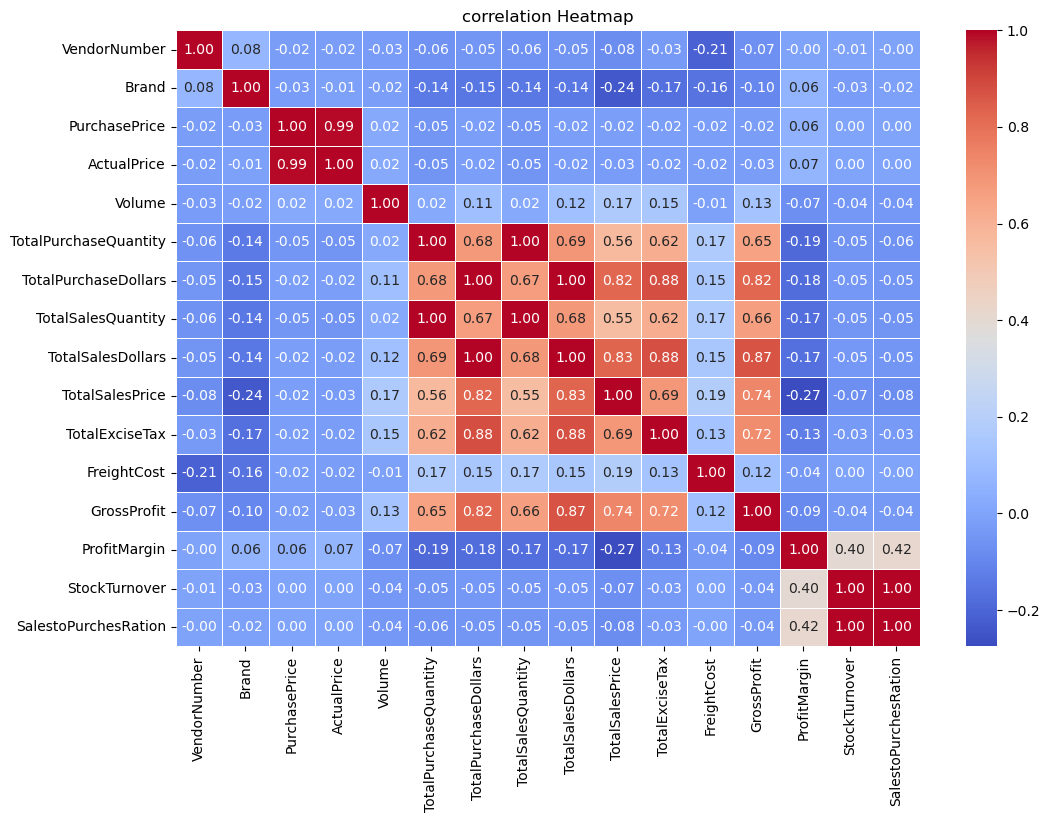

In [11]:
# Correlation Heatmap

numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths = 0.5)
plt.title("correlation Heatmap")
plt.show()

## Correlation Insights
- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
- StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.


# Data Analysis:

#### Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [53]:
df.groupby('Description').agg({'TotalSalesDollars':'sum', 'ProfitMargin':'mean'})

,TotalSalesDollars,ProfitMargin
Description,,
(RI) 1,18657.89,5.495209
.nparalleled Svgn Blanc,1046.69,26.771059
10 Span Cab Svgn CC,2389.31,10.528144
10 Span Chard CC,3055.92,21.436425
10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...
Zorvino Vyds Mango Magnifico,13464.22,6.271585
Zorvino Vyds Peachez,12247.74,3.897699
Zorvino Vyds Pearz,16443.54,13.754885


In [54]:
brand_performance = df.groupby('Description').agg(
    TotalSalesDollars = ('TotalSalesDollars','sum'),
    ProfitMargin = ('ProfitMargin', 'mean'))

brand_performance.sort_values('ProfitMargin')

,TotalSalesDollars,ProfitMargin
Description,,
Margaritaville Island Lime,463.68,0.017253
Dom de La Foret 15 Rose,359.76,0.033356
Flint & Steel Svgn Bl Napa V,119.92,0.033356
Head to Head Red Toscana,389.61,0.053900
Douglass Hill Merlot,143.76,0.083472
...,...,...
M Chiarlo Gavi Wh,1088.01,99.326293
Beniotome Sesame Shochu,4498.50,99.506280
DiSaronno Amaretto,4613.40,99.537001


In [55]:
# threshold for "low sales" (bottom 15%) and "high margin" (top 15%)

low_sales_thresold = brand_performance['TotalSalesDollars'].quantile(0.15)

low_sales_thresold

np.float64(590.7594999999999)

In [56]:
high_margin_thresold = brand_performance['ProfitMargin'].quantile(0.85)
high_margin_thresold

np.float64(67.53607328418936)

In [57]:
# Filter brand with low sales but high profit margins:

# Brands with Low Sales but High Profit Margins:
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_thresold) & 
    (brand_performance['ProfitMargin'] >= high_margin_thresold)
]

target_brands

,TotalSalesDollars,ProfitMargin
Description,,
12 Days of Pearls Gift Set,309.69,97.678323
4 Orange Vodka,483.78,85.902683
A Bichot Merc Champs M,515.88,94.552997
Absolut Orient Apple Vodka,119.94,87.652159
Admiral Nelson Egg Nog,450.31,79.387533
...,...,...
Woodford Rsv Master Coll Pnt,489.95,73.760588
Zardetto Pros di Coneg Brut,345.86,88.758457
Zerran Tinto Montsant,139.91,77.592738


In [58]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000] # for better visualization

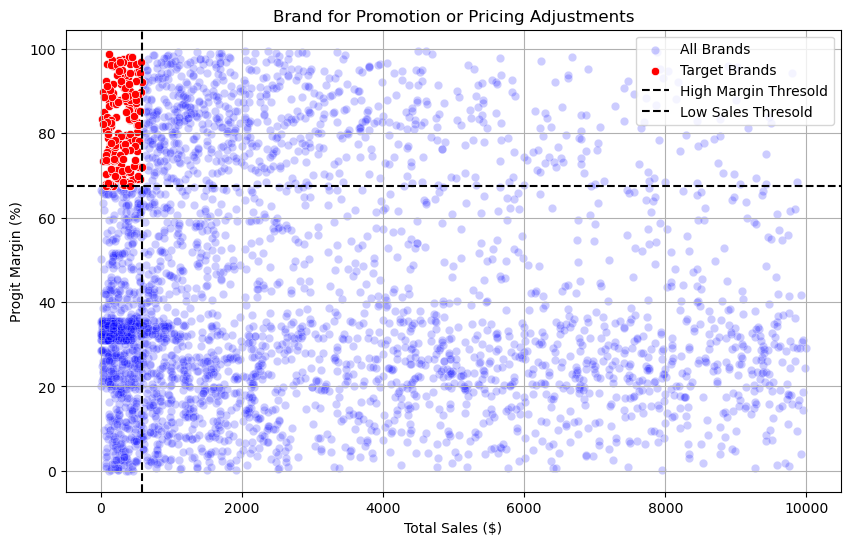

In [59]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data = brand_performance, x='TotalSalesDollars', y= 'ProfitMargin', color='blue', label='All Brands', alpha = 0.2)
sns.scatterplot(data=target_brands, x= 'TotalSalesDollars', y= 'ProfitMargin', color= 'red', label= 'Target Brands' )

plt.axhline(high_margin_thresold, linestyle='--', color='black', label="High Margin Thresold")
plt.axvline(low_sales_thresold, linestyle='--', color='black', label="Low Sales Thresold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Progit Margin (%)")
plt.title("Brand for Promotion or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

## Which vendors and brands demonstrate the highest sales performance?

In [60]:
# This function formats large numeric dollar values into a readable form:
# - Converts values >= 1,000,000 to millions (M)
# - Converts values >= 1,000 to thousands (K)
# - Keeps smaller values as-is
# Useful for displaying sales figures clearly in reports and visualizations

def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [61]:
# Top Vendor & Brand by sales Performance:

top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_vendors.apply(lambda x:format_dollars(x))

top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
# totop_brands.apply(lambda x:format_dollars(x))



In [21]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      49502270.27
MARTIGNETTI COMPANIES         31874242.14
JIM BEAM BRANDS COMPANY       22938179.92
PERNOD RICARD USA             21726630.86
BACARDI USA INC               20181891.57
CONSTELLATION BRANDS INC      20056052.29
E & J GALLO WINERY            14924945.06
BROWN-FORMAN CORP             13913699.34
ULTRA BEVERAGE COMPANY LLP    12860272.09
M S WALKER INC                11847010.29
Name: TotalSalesDollars, dtype: float64

In [22]:
top_brands

Description
Jack Daniels No 7 Black    6286529.92
Tito's Handmade Vodka      6187153.73
Grey Goose Vodka           6023819.58
Absolut 80 Proof           5345360.06
Capt Morgan Spiced Rum     5037581.78
Ketel One Vodka            4225604.09
Tanqueray                  2990481.34
Jim Beam                   2818250.54
Kahlua                     2784784.19
Baileys Irish Cream        2718910.96
Name: TotalSalesDollars, dtype: float64

In [213]:
# top_brand.to_frame()

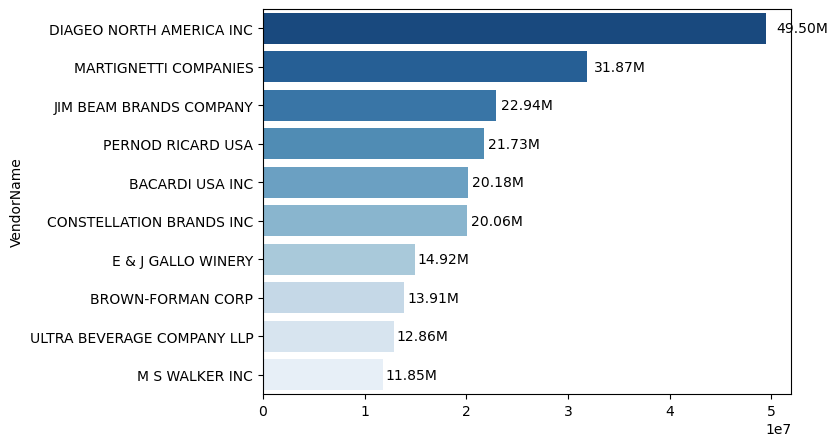

In [23]:
# Create a side-by-side bar chart to visualize the Top 10 Vendors and Top 10 Brands
# based on Total Sales Dollars.
# Each bar represents total sales, and formatted sales values (K/M) are displayed
# at the end of each bar for better readability.



plt.figure(figsize=(15, 5))

# plot for Top Vendors
plt.subplot(1, 2, i+1)
ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values, palette = "Blues_r")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02), 
            bar.get_y() + bar.get_height()/2,
            format_dollars(bar.get_width()),
            ha = 'left', va='center', fontsize=10, color='black')




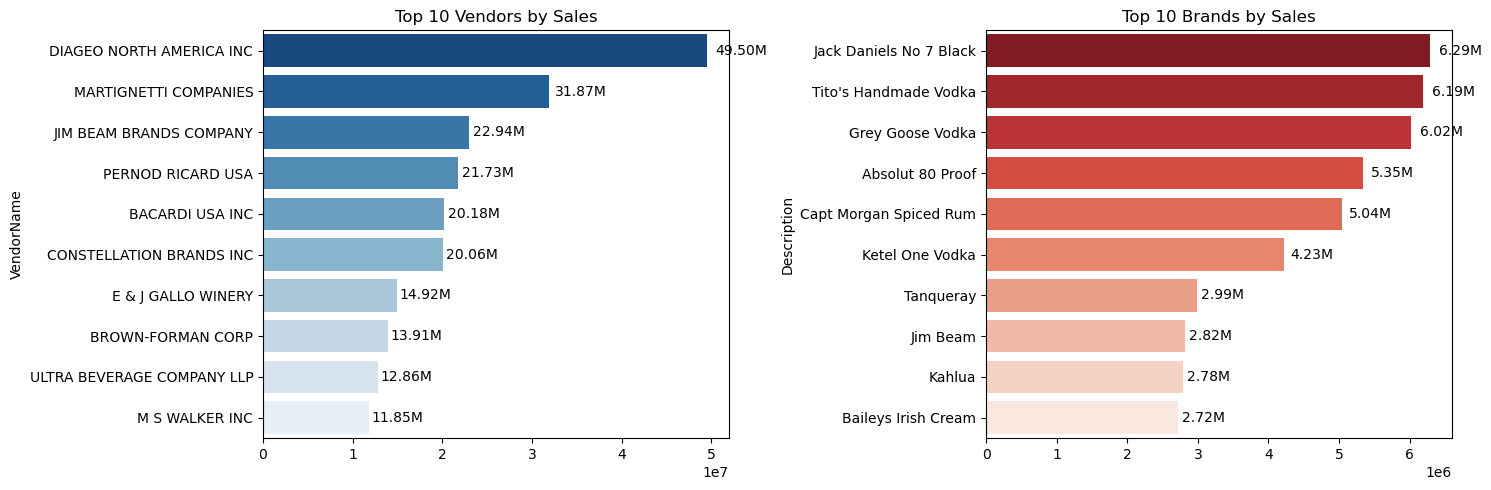

In [62]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Which Vendor contibute the most to Total Purchase doller:

In [73]:
# Rank Vendors by Total Purchase Dollars

vendor_performance = df.groupby('VendorName').agg(
    TotalPurchaseDollars = ('TotalPurchaseDollars', 'sum'),
    GrossProfit = ('GrossProfit', 'sum'),
    TotalSalesDollars = ('TotalSalesDollars', 'sum')
).reset_index()

# we can use the 'to_fram()' to create dataFrame from series 


vendor_performance.shape

(113, 4)

In [74]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ALISA CARR BEVERAGES,25698.12,66432.04,92130.16
1,ALTAMAR BRANDS LLC,11427.20,1670.18,13097.38
2,AMERICAN SPIRITS EXCHANGE,934.08,307.23,1241.31
3,AMERICAN VINTAGE BEVERAGE,104435.68,13422.59,117858.27
4,ATLANTIC IMPORTING COMPANY,3230.68,9287.09,12517.77
...,...,...,...,...
108,WEIN BAUER INC,38956.32,2696.26,41652.58
109,WESTERN SPIRITS BEVERAGE CO,272579.98,49913.79,322493.77
110,WILLIAM GRANT & SONS INC,3416247.88,447817.36,3864065.24
111,WINE GROUP INC,5140619.34,1937176.82,7077796.16


In [75]:
# Calculate Contribution % to Overall Procurement
vendor_performance["Purchase_Contribution%"] = (vendor_performance["TotalPurchaseDollars"] / vendor_performance["TotalPurchaseDollars"].sum()) * 100

# Rank Vendors by Total Purchase Dollars & Profitability
vendor_performance = round(vendor_performance.sort_values(by = 'Purchase_Contribution%', ascending = False), 2)
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
24,DIAGEO NORTH AMERICA INC,43234750.05,6267520.22,49502270.27,15.94
55,MARTIGNETTI COMPANIES,24496591.01,7377651.13,31874242.14,9.03
44,JIM BEAM BRANDS COMPANY,19618121.22,3320058.70,22938179.92,7.23
66,PERNOD RICARD USA,19043962.28,2682668.58,21726630.86,7.02
5,BACARDI USA INC,16650847.08,3531044.49,20181891.57,6.14
...,...,...,...,...,...
42,"IRA GOLDMAN AND WILLIAMS, LLP",190.88,474.94,665.82,0.00
32,FANTASY FINE WINES CORP,128.64,135.03,263.67,0.00
83,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
15,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [88]:
# Display Top 10 Vendor

top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendor['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
24,DIAGEO NORTH AMERICA INC,43.23M,6267520.22,49.50M,15.94
55,MARTIGNETTI COMPANIES,24.50M,7377651.13,31.87M,9.03
44,JIM BEAM BRANDS COMPANY,19.62M,3320058.70,22.94M,7.23
66,PERNOD RICARD USA,19.04M,2682668.58,21.73M,7.02
5,BACARDI USA INC,16.65M,3531044.49,20.18M,6.14
19,CONSTELLATION BRANDS INC,14.74M,5312444.82,20.06M,5.44
10,BROWN-FORMAN CORP,11.92M,1998072.74,13.91M,4.39
29,E & J GALLO WINERY,11.56M,3362897.91,14.92M,4.26
102,ULTRA BEVERAGE COMPANY LLP,9.90M,2961841.86,12.86M,3.65
51,M S WALKER INC,9.14M,2705845.44,11.85M,3.37


In [89]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
24,DIAGEO NORTH AMERICA INC,43.23M,6267520.22,49.50M,15.94
55,MARTIGNETTI COMPANIES,24.50M,7377651.13,31.87M,9.03
44,JIM BEAM BRANDS COMPANY,19.62M,3320058.70,22.94M,7.23
66,PERNOD RICARD USA,19.04M,2682668.58,21.73M,7.02
5,BACARDI USA INC,16.65M,3531044.49,20.18M,6.14
19,CONSTELLATION BRANDS INC,14.74M,5312444.82,20.06M,5.44
10,BROWN-FORMAN CORP,11.92M,1998072.74,13.91M,4.39
29,E & J GALLO WINERY,11.56M,3362897.91,14.92M,4.26
102,ULTRA BEVERAGE COMPANY LLP,9.90M,2961841.86,12.86M,3.65
51,M S WALKER INC,9.14M,2705845.44,11.85M,3.37


In [94]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%,Cumutative_Contibution%,Cumulative_Contribution%
24,DIAGEO NORTH AMERICA INC,43.23M,6267520.22,49.50M,15.94,15.94,15.94
55,MARTIGNETTI COMPANIES,24.50M,7377651.13,31.87M,9.03,24.97,24.97
44,JIM BEAM BRANDS COMPANY,19.62M,3320058.70,22.94M,7.23,32.20,32.20
66,PERNOD RICARD USA,19.04M,2682668.58,21.73M,7.02,39.22,39.22
5,BACARDI USA INC,16.65M,3531044.49,20.18M,6.14,45.36,45.36
19,CONSTELLATION BRANDS INC,14.74M,5312444.82,20.06M,5.44,50.80,50.80
10,BROWN-FORMAN CORP,11.92M,1998072.74,13.91M,4.39,55.19,55.19
29,E & J GALLO WINERY,11.56M,3362897.91,14.92M,4.26,59.45,59.45
102,ULTRA BEVERAGE COMPANY LLP,9.90M,2961841.86,12.86M,3.65,63.10,63.10
51,M S WALKER INC,9.14M,2705845.44,11.85M,3.37,66.47,66.47


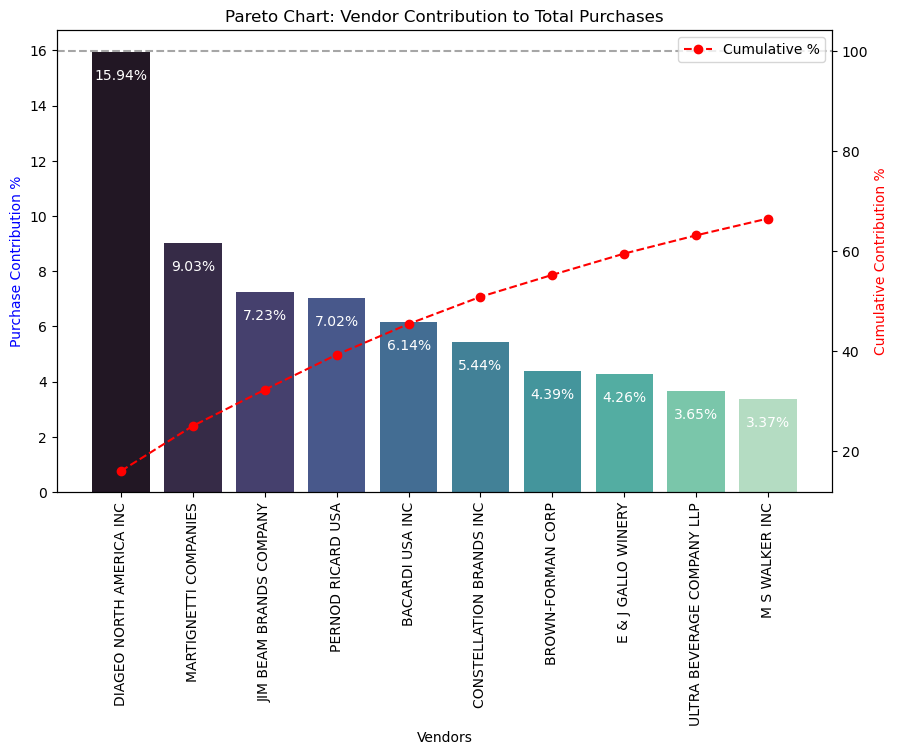

In [96]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'],  palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

## How much of Total procurement is dependent on the top vendors?

In [98]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 66.47 %


Total Purchase Contribution of top 10 vendors is 66.47 %


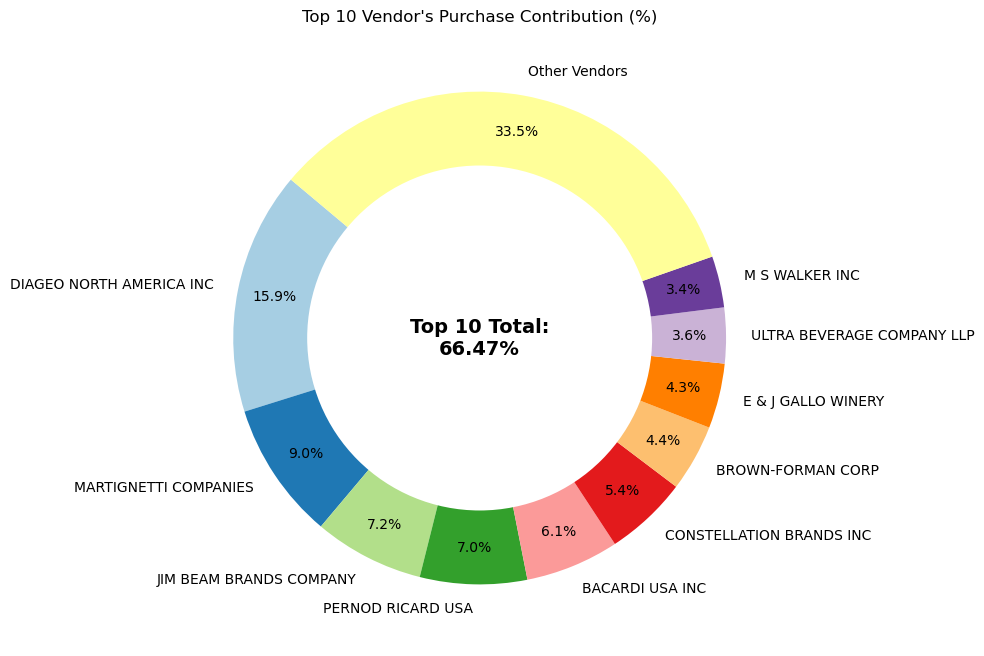

In [99]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)} %")

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution
 
# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

The remaining vendors contribute only 33.5%, meaning they are not utilized effectively or may not be as competitive.
If vendor dependency is too high, consider identifying new suppliers to reduce risk.

### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [113]:
# Calculate Unit Purchase Price per Vendor & Volume Group
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalSalesQuantity']

# Group by Order Sizes (e.g., Small, Medium, Large Purchases)
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels = ['Small', 'medium', 'large'])

# Analyze Cost Savings per Order Size
df.groupby('OrderSize')['UnitPurchasePrice'].mean()



OrderSize
Small     30.345758
medium    15.447190
large     12.222881
Name: UnitPurchasePrice, dtype: float64

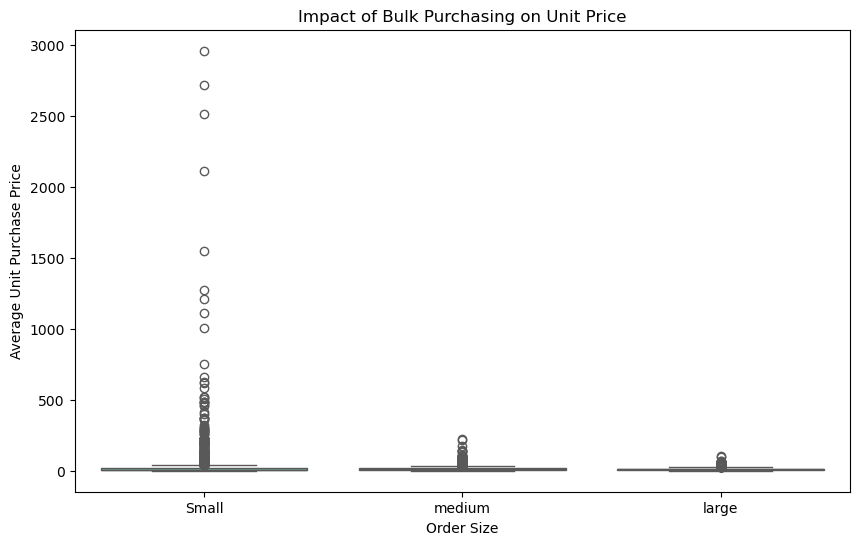

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()


- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [120]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.500000
HAUNTING WHISPER VYDS,0.659701
THE PIERPONT GROUP LLC,0.687023
KLIN SPIRITS LLC,0.687812
Dunn Wine Brokers,0.694353
DJINN SPIRITS LLC,0.696640
HIGHLAND WINE MERCHANTS LLC,0.708333
INCREDIBREW INC,0.708635
LABELLE VYDS AND WINERY,0.714071


- Slow-moving inventory increases holding costs (warehouse rent, insurance, depreciation)
- Identifying vendors with low inventory turnover is critical for business efficiency, cost reduction, and profitability


## How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [121]:
# Calculate Unsold Inventory Value
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

Total Unsold Capital: 42.68M


,VendorName,UnsoldInventoryValue
24,DIAGEO NORTH AMERICA INC,7.55M
55,MARTIGNETTI COMPANIES,3.81M
66,PERNOD RICARD USA,3.31M
44,JIM BEAM BRANDS COMPANY,3.04M
5,BACARDI USA INC,2.34M
19,CONSTELLATION BRANDS INC,2.29M
29,E & J GALLO WINERY,2.05M
10,BROWN-FORMAN CORP,2.03M
77,SAZERAC CO INC,1.40M
51,M S WALKER INC,1.25M


#### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [122]:
# Define top and low vendors based on Total Sales Dollars (Top 25% & Bottom 25%)
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [123]:
# Function to compute confidence interval
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (19.73, 20.87), Mean: 20.30
Low Vendors 95% CI: (42.18, 44.66), Mean: 43.42


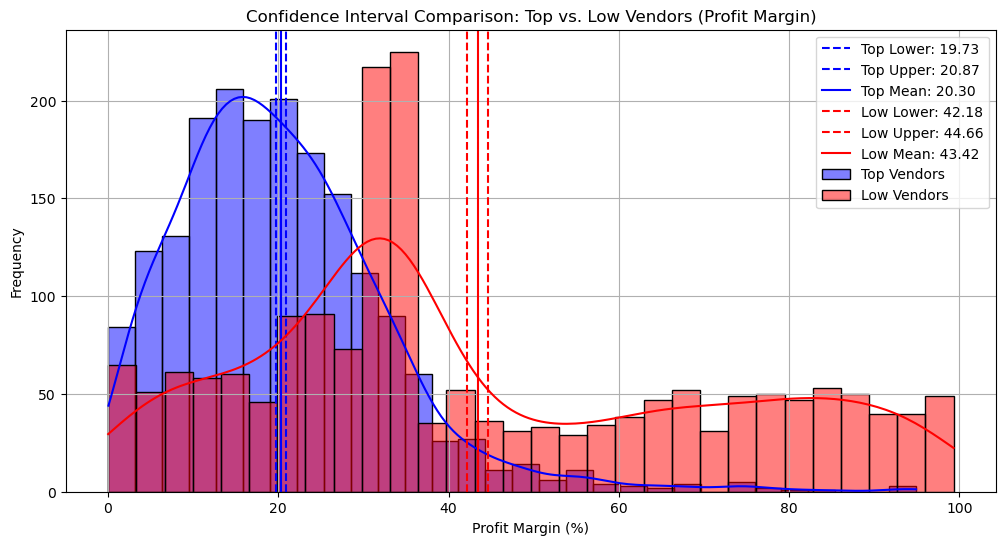

In [125]:
# Compute confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

#### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [126]:

top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: -33.2329, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


- A p-value this small suggests that the difference is not just statistically significant but also practically meaningful.

- The two vendor groups operate very differently in terms of profitability.

In [ ]:
# Use this script to save csv files into database with their filename as tablename
import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time

logging.basicConfig(
    filename="logs/ingestion_db.log", 
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s", 
    filemode="a"  
)

engine = create_engine('sqlite:///inventory.db')

def ingest_db(df, table_name, engine):
    '''this function will ingest the dataframe into database table'''
    df.to_sql(table_name, con = engine, if_exists = 'replace', index = False)
    
def load_raw_data():
    '''this function will load the CSVs as dataframe and ingest into db'''
    start = time.time()
    for file in os.listdir('data'):
        if '.csv' in file:
            df = pd.read_csv('data/'+file)
            logging.info(f'Ingesting {file} in db')
            ingest_db(df, file[:-4], engine)
    end = time.time()
    total_time = (end - start)/60
    logging.info('--------------Ingestion Complete------------')
    
    logging.info(f'\nTotal Time Taken: {total_time} minutes')

if __name__ == '__main__':
    load_raw_data()
